In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos=pd.read_csv('../data/forexfactorydata.csv')

In [3]:
print(datos.head())
print(datos.info())


      id             datetime currency                event        impact  \
0  12245  2007-01-01 00:00:00      CAD         Bank Holiday  Non-Economic   
1  12036  2007-01-01 00:00:00      CHF         Bank Holiday  Non-Economic   
2  23272  2007-01-01 00:00:00      CNY         Bank Holiday  Non-Economic   
3  12214  2007-01-01 00:00:00      EUR  French Bank Holiday  Non-Economic   
4  12186  2007-01-01 00:00:00      EUR  German Bank Holiday  Non-Economic   

   actual actual_unit  forecast forecast_unit  previous previous_unit  \
0     NaN         NaN       NaN           NaN       NaN           NaN   
1     NaN         NaN       NaN           NaN       NaN           NaN   
2     NaN         NaN       NaN           NaN       NaN           NaN   
3     NaN         NaN       NaN           NaN       NaN           NaN   
4     NaN         NaN       NaN           NaN       NaN           NaN   

  previous_revised  
0              NaN  
1              NaN  
2              NaN  
3             

In [7]:
usd_economicos = datos[(datos['currency'] == 'USD') & (datos['impact'] != 'Non-Economic')]


In [41]:
usd_economicos['event'].unique()

array(['Total Vehicle Sales', 'ADP Non-Farm Employment Change',
       'Construction Spending m/m', 'ISM Manufacturing PMI',
       'ISM Manufacturing Prices', 'FOMC Meeting Minutes',
       'Challenger Job Cuts y/y', 'Unemployment Claims',
       'Factory Orders m/m', 'ISM Services PMI', 'Pending Home Sales m/m',
       'Crude Oil Inventories', 'Average Hourly Earnings m/m',
       'Non-Farm Employment Change', 'Unemployment Rate',
       'Natural Gas Storage', 'Fed Chairman Bernanke Speaks',
       'FOMC Member Kohn Speaks', 'Consumer Credit m/m',
       'NFIB Small Business Index', 'RCM/TIPP Economic Optimism',
       'Trade Balance', 'Final Wholesale Inventories m/m',
       'JOLTS Job Openings', 'FOMC Member Geithner Speaks',
       'Core Retail Sales m/m', 'Import Prices m/m', 'Retail Sales m/m',
       'Business Inventories m/m', 'Federal Budget Balance',
       'Empire State Manufacturing Index', 'Core PPI m/m', 'PPI m/m',
       'TIC Long-Term Purchases', 'Capacity Utilization

C:\Users\jamal\AppData\Local\Temp\ipykernel_3344\3878006264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_economicos['month'] = usd_economicos['datetime'].dt.month


<Axes: title={'center': 'Eventos USD por Mes'}, xlabel='month'>

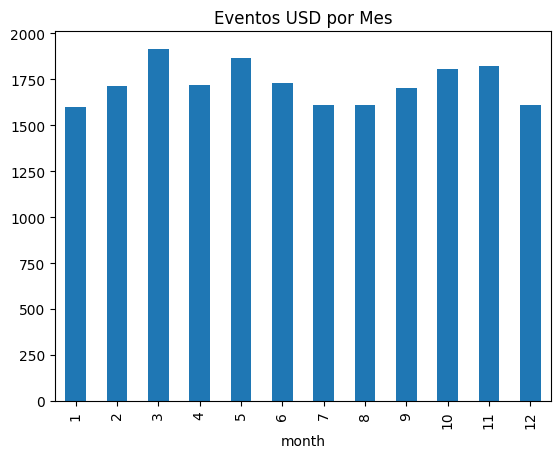

In [10]:
usd_economicos['month'] = usd_economicos['datetime'].dt.month
usd_economicos['month'].value_counts().sort_index().plot(kind='bar', title='Eventos USD por Mes')


In [11]:
comparacion = usd_economicos[['event', 'actual', 'forecast', 'impact']].dropna()
comparacion['desviacion'] = comparacion['actual'] - comparacion['forecast']
comparacion.head(10)


,event,actual,forecast,impact,desviacion
22,Total Vehicle Sales,16.7,16.5,Low Impact Expected,0.2
28,ADP Non-Farm Employment Change,-40.0,120.0,Medium Impact Expected,-160.0
29,Construction Spending m/m,-0.2,-0.6,Low Impact Expected,0.4
30,ISM Manufacturing PMI,51.4,51.0,High Impact Expected,0.4
31,ISM Manufacturing Prices,47.5,54.0,Low Impact Expected,-6.5
50,Unemployment Claims,329.0,318.0,Low Impact Expected,11.0
51,Factory Orders m/m,0.9,1.5,Medium Impact Expected,-0.6
52,ISM Services PMI,57.1,58.0,High Impact Expected,-0.9
53,Pending Home Sales m/m,-0.5,0.0,High Impact Expected,-0.5
54,Crude Oil Inventories,-1.3,-2.0,Low Impact Expected,0.7


In [23]:
import pandas as pd
import yfinance as yf

# 1. Descargar S&P 500
sp500 = yf.download('^GSPC', start='2007-01-01', end='2025-01-01')

# 2. Aplanar MultiIndex si lo hay
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in sp500.columns]

# 3. Quedarnos con el cierre ajustado
for col in sp500.columns:
    if 'Close' in col:
        sp500 = sp500.rename(columns={col: 'sp500_close'})
        break
sp500 = sp500[['sp500_close']]
sp500.index = pd.to_datetime(sp500.index)

# 4. Procesar fechas en los eventos (suponiendo que ya tienes `usd_economicos`)
usd_economicos['date'] = pd.to_datetime(usd_economicos['datetime']).dt.floor('D')

# 5. Merge con cierre del mismo día
merged = usd_economicos.merge(sp500, left_on='date', right_index=True, how='left')

# 6. Agregar cierre del día siguiente
sp500_next_day = sp500.shift(-1).rename(columns={'sp500_close': 'sp500_close_next_day'})
merged = merged.merge(sp500_next_day, left_on='date', right_index=True, how='left')

# 7. Calcular retorno
merged['sp500_return'] = (merged['sp500_close_next_day'] - merged['sp500_close']) / merged['sp500_close']


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True



C:\Users\jamal\AppData\Local\Temp\ipykernel_3344\2098364678.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_economicos['date'] = pd.to_datetime(usd_economicos['datetime']).dt.floor('D')


C:\Users\jamal\AppData\Local\Temp\ipykernel_3344\2605070556.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_events.values, y=worst_events.index, palette='rocket')


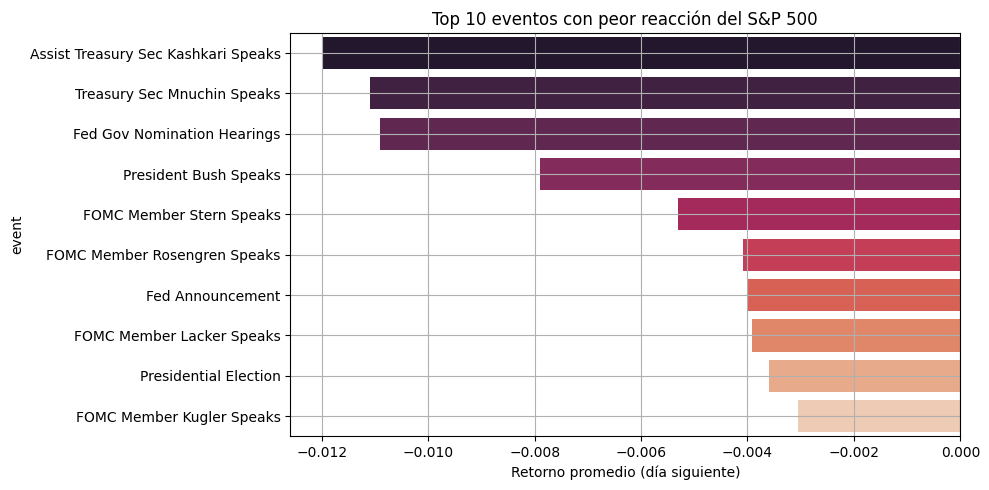

In [ ]:
worst_events = (
    merged.groupby('event')['sp500_return']
    .mean()
    .sort_values()
    .dropna()
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=worst_events.values, y=worst_events.index, palette='rocket')
plt.title('Top 10 eventos con peor reacción del S&P 500')
plt.xlabel('Retorno promedio (día siguiente)')
plt.grid(True)
plt.tight_layout()
plt.show()
l

In [31]:
# Agregamos precio del día anterior para calcular retorno en el mismo día
sp500_prev_day = sp500.shift(1).rename(columns={'sp500_close': 'sp500_close_prev_day'})
merged = merged.merge(sp500_prev_day, left_on='date', right_index=True, how='left')

# Retorno el día del evento
merged['sp500_return_same_day'] = (merged['sp500_close'] - merged['sp500_close_prev_day']) / merged['sp500_close_prev_day']




In [32]:
returns_by_event = (
    merged.groupby('event')[['sp500_return_same_day', 'sp500_return']]
    .mean()
    .dropna()
    .sort_values(by='sp500_return')
)


In [39]:
usd_economicos 

,id,datetime,currency,event,impact,actual,actual_unit,forecast,forecast_unit,previous,previous_unit,previous_revised,year,month,date
22,3256,2007-01-03 00:00:00,USD,Total Vehicle Sales,Low Impact Expected,16.7,unit_million,16.5,unit_million,16.1,unit_million,False,2007,1,2007-01-03
28,3238,2007-01-03 13:15:00,USD,ADP Non-Farm Employment Change,Medium Impact Expected,-40.0,unit_thousand,120.0,unit_thousand,230.0,unit_thousand,True,2007,1,2007-01-03
29,3239,2007-01-03 15:00:00,USD,Construction Spending m/m,Low Impact Expected,-0.2,unit_percentage,-0.6,unit_percentage,-1.0,unit_percentage,False,2007,1,2007-01-03
30,3236,2007-01-03 15:00:00,USD,ISM Manufacturing PMI,High Impact Expected,51.4,unit_none,51.0,unit_none,49.5,unit_none,False,2007,1,2007-01-03
31,3237,2007-01-03 15:00:00,USD,ISM Manufacturing Prices,Low Impact Expected,47.5,unit_none,54.0,unit_none,53.5,unit_none,False,2007,1,2007-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81757,136574,2024-12-26 13:30:00,USD,Unemployment Claims,High Impact Expected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,12,2024-12-26
81758,137616,2024-12-26 16:00:00,USD,Crude Oil Inventories,Low Impact Expected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,12,2024-12-26
81766,136938,2024-12-27 13:30:00,USD,Goods Trade Balance,Low Impact Expected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,12,2024-12-27
81767,136926,2024-12-27 13:30:00,USD,Prelim Wholesale Inventories m/m,Low Impact Expected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,12,2024-12-27


In [42]:
import pandas as pd
import yfinance as yf

# 1. Descargar S&P 500 (si aún no lo has hecho)
sp500 = yf.download('^GSPC', start='2007-01-01', end='2025-01-01')
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in sp500.columns]
for col in sp500.columns:
    if 'Close' in col:
        sp500 = sp500.rename(columns={col: 'sp500_close'})
        break
sp500 = sp500[['sp500_close']]
sp500.index = pd.to_datetime(sp500.index)

# Suponiendo que tu DataFrame original se llama 'datos'
datos['date'] = pd.to_datetime(datos['datetime']).dt.floor('D')

# 2. Merge con cierre del mismo día
merged_all = datos.merge(sp500, left_on='date', right_index=True, how='left')

# 3. Agregar cierre del día siguiente y calcular el retorno
sp500_next_day = sp500.shift(-1).rename(columns={'sp500_close': 'sp500_close_next_day'})
merged_all = merged_all.merge(sp500_next_day, left_on='date', right_index=True, how='left')
merged_all['sp500_return'] = (merged_all['sp500_close_next_day'] - merged_all['sp500_close']) / merged_all['sp500_close']

[*********************100%***********************]  1 of 1 completed


In [43]:
# Calcular el retorno promedio del S&P 500 para cada tipo de evento
average_return_by_event = merged_all.groupby('event')['sp500_return'].mean().sort_values()

print("Retorno Promedio del S&P 500 por Evento (ordenado):\n", average_return_by_event)

# También podemos ver la cantidad de veces que ocurre cada evento para tener una idea de la robustez del promedio
event_counts = merged_all['event'].value_counts()
print("\nNúmero de Ocurrencias por Evento:\n", event_counts)

Retorno Promedio del S&P 500 por Evento (ordenado):
 event
EU Membership Vote                 -0.035920
Irish Stability Treaty Vote        -0.024643
Federal Election                   -0.019906
Gov Council Member Duguay Speaks   -0.016398
MPC Member Gieve Speaks            -0.014966
                                      ...   
Lower House Elections                    NaN
SNB Gold Asset Vote                      NaN
Spanish Parliamentary Election           NaN
Unconditional Basic Income Vote          NaN
Upper House Elections                    NaN
Name: sp500_return, Length: 586, dtype: float64

Número de Ocurrencias por Evento:
 event
Unemployment Rate                      1658
Bank Holiday                           1624
Trade Balance                          1411
Retail Sales m/m                       1130
Unemployment Claims                     939
                                       ... 
Italian Constitution Amendment Vote       1
Greek Bailout Vote                        1
Unco

In [45]:
frequent_events = event_counts[event_counts > 50].index
frequent_events_returns = average_return_by_event[frequent_events].sort_values()
print("\nRetorno Promedio del S&P 500 para Eventos Frecuentes (ordenado):\n", frequent_events_returns)


Retorno Promedio del S&P 500 para Eventos Frecuentes (ordenado):
 event
Fed Announcement                     -0.004015
German Buba President Weber Speaks   -0.003608
Monetary Policy Summary              -0.003388
PPI Output q/q                       -0.003056
PPI Input q/q                        -0.003056
                                        ...   
BusinessNZ Services Index             0.004462
Treasury Sec Paulson Speaks           0.004836
Rightmove HPI m/m                     0.005130
BOE Quarterly Bulletin                0.005480
Daylight Saving Time Shift                 NaN
Name: sp500_return, Length: 398, dtype: float64


Número de eventos significativos (umbral > 0.002): 39


C:\Users\jamal\AppData\Local\Temp\ipykernel_3344\3960978130.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_events_returns.values, y=significant_events_returns.index, palette="viridis")


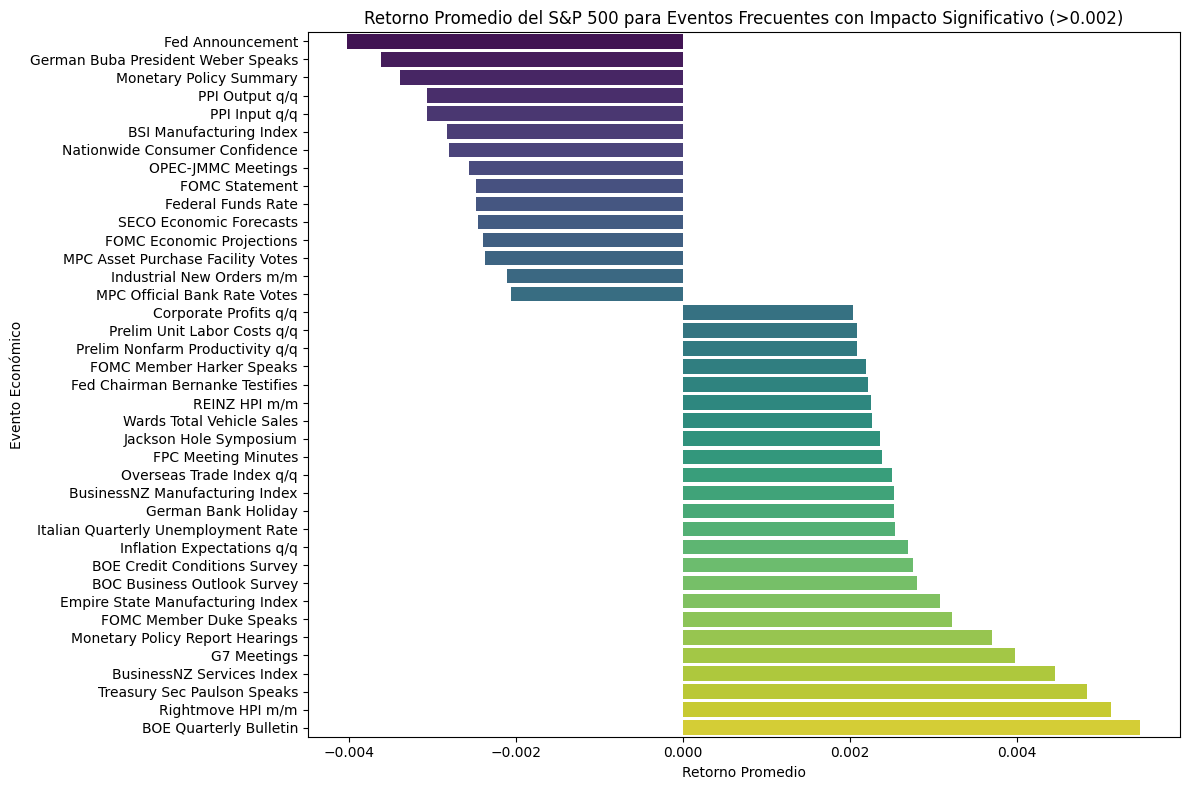

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establece un umbral para el valor absoluto del retorno promedio
threshold = 0.002  # Puedes ajustar este valor según lo que consideres "muy cerca de cero"

# Filtra los eventos frecuentes cuyo valor absoluto del retorno promedio sea mayor que el umbral
significant_events_returns = frequent_events_returns[abs(frequent_events_returns) > threshold].sort_values()

print(f"Número de eventos significativos (umbral > {threshold}): {len(significant_events_returns)}")

# Visualiza los eventos significativos
plt.figure(figsize=(12, 8))
sns.barplot(x=significant_events_returns.values, y=significant_events_returns.index, palette="viridis")
plt.title(f'Retorno Promedio del S&P 500 para Eventos Frecuentes con Impacto Significativo (>{threshold})')
plt.xlabel('Retorno Promedio')
plt.ylabel('Evento Económico')
plt.tight_layout()
plt.show()

In [53]:
print(merged_all)

           id             datetime currency                             event  \
0       12245  2007-01-01 00:00:00      CAD                      Bank Holiday   
1       12036  2007-01-01 00:00:00      CHF                      Bank Holiday   
2       23272  2007-01-01 00:00:00      CNY                      Bank Holiday   
3       12214  2007-01-01 00:00:00      EUR               French Bank Holiday   
4       12186  2007-01-01 00:00:00      EUR               German Bank Holiday   
...       ...                  ...      ...                               ...   
81764  134852  2024-12-27 07:45:00      EUR             French Prelim CPI m/m   
81765  135050  2024-12-27 08:00:00      CHF            KOF Economic Barometer   
81766  136938  2024-12-27 13:30:00      USD               Goods Trade Balance   
81767  136926  2024-12-27 13:30:00      USD  Prelim Wholesale Inventories m/m   
81768  135971  2024-12-27 15:30:00      USD               Natural Gas Storage   

                    impact 

In [55]:
empleo_events = merged_all[merged_all['event_category'] == 'Empleo'].copy()
empleo_events = empleo_events.sort_values(by='datetime')

In [58]:
print(empleo_events['datetime'].dtype)

object


In [59]:
empleo_events['datetime'] = pd.to_datetime(empleo_events['datetime'])
print(empleo_events['datetime'].dtype) # Verifícalo de nuevo

datetime64[ns]


In [62]:
nfp_events_df = merged_all[merged_all['event'] == 'Non-Farm Employment Change'].sort_values(by='datetime')
nfp_dates = nfp_events_df['datetime']

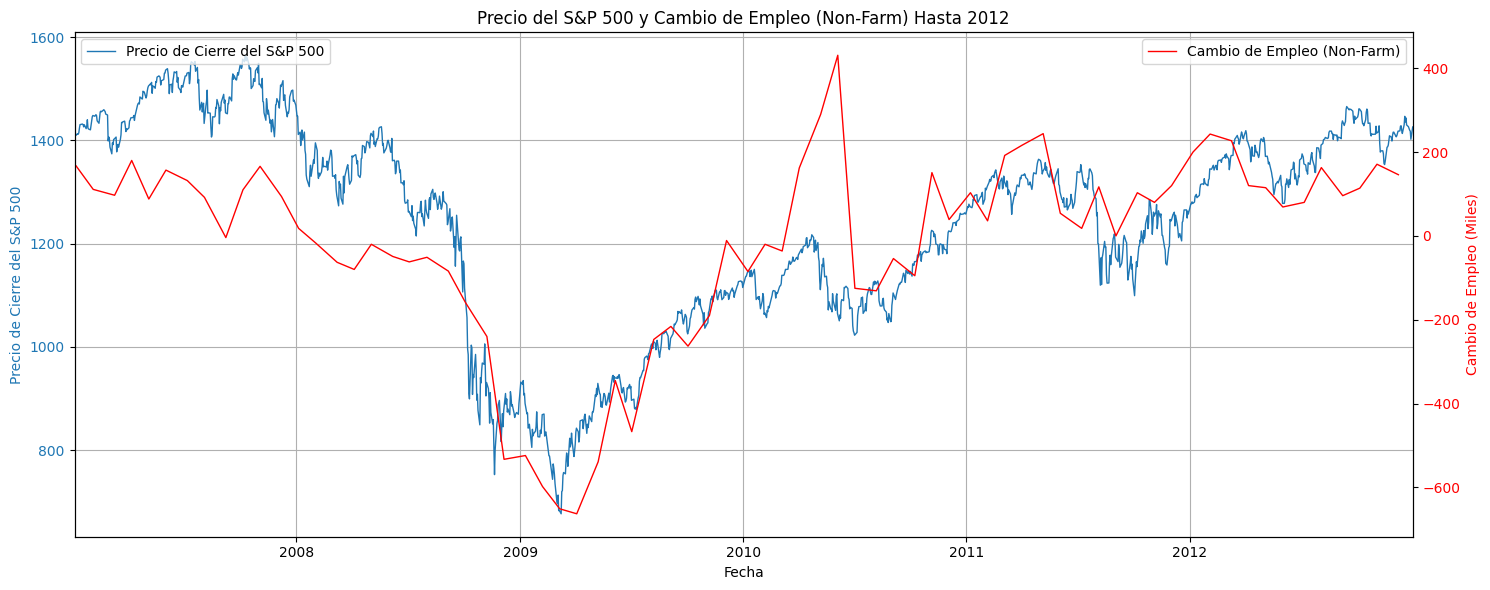

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que 'datetime' sea datetime64 y eliminar NaNs
nfp_events_df['datetime'] = pd.to_datetime(nfp_events_df['datetime'], errors='coerce')
nfp_events_df = nfp_events_df.dropna(subset=['datetime', 'actual'])

# Crear la figura y el primer eje para el precio del S&P 500
fig, ax1 = plt.subplots(figsize=(15, 6))

color_sp500 = 'tab:blue'
ax1.plot(sp500.loc[:'2012-12-31'].index, sp500.loc[:'2012-12-31']['sp500_close'], color=color_sp500, linewidth=1, label='Precio de Cierre del S&P 500')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de Cierre del S&P 500', color=color_sp500)
ax1.tick_params(axis='y', labelcolor=color_sp500)
ax1.grid(True)
ax1.legend(loc='upper left')

# Crear el segundo eje para el cambio de empleo
ax2 = ax1.twinx()
color_nfp = 'red'
ax2.plot(nfp_events_df[nfp_events_df['datetime'] <= '2012-12-31']['datetime'],
         nfp_events_df[nfp_events_df['datetime'] <= '2012-12-31']['actual'],
         color=color_nfp, linewidth=1, label='Cambio de Empleo (Non-Farm)')
ax2.set_ylabel('Cambio de Empleo (Miles)', color=color_nfp)
ax2.tick_params(axis='y', labelcolor=color_nfp)
ax2.legend(loc='upper right')

# Establecer los límites del eje x
ax1.set_xlim(sp500.index.min(), pd.to_datetime('2012-12-31'))

# Añadir un título
plt.title('Precio del S&P 500 y Cambio de Empleo (Non-Farm) Hasta 2012')
fig.tight_layout()
plt.show()

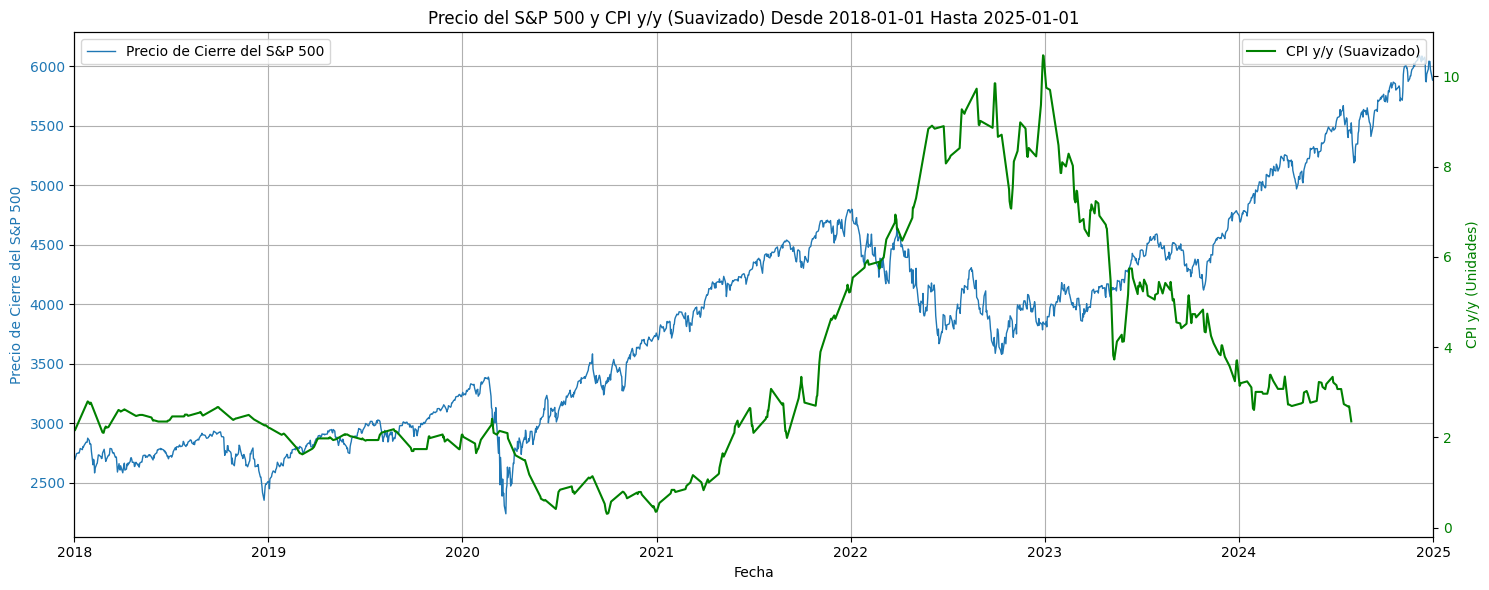

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Variables para las fechas ---
start_date = '2018-01-01'
end_date = '2025-01-01'  # Puedes ajustar esta fecha o usar sp500.index.max() para el final de los datos

# --- Variable para el evento de inflación ---
inflation_event = 'CPI y/y'  # Puedes cambiarlo a otro evento de inflación en tu DataFrame

# Asegurarse de que 'datetime' sea datetime64 y eliminar NaNs para el evento de inflación
inflation_df = merged_all[merged_all['event'] == inflation_event].copy()
inflation_df['datetime'] = pd.to_datetime(inflation_df['datetime'], errors='coerce')
inflation_df = inflation_df.dropna(subset=['datetime', 'actual'])
inflation_df = inflation_df.sort_values(by='datetime')
inflation_df = inflation_df.set_index('datetime')

# Convertir las variables de fecha a objetos datetime de Pandas
start_date_dt = pd.to_datetime(start_date)
end_date_dt = pd.to_datetime(end_date)

# --- Calcular la media del CPI y remuestrear a frecuencia diaria para suavizar ---
daily_inflation = inflation_df['actual'].resample('D').ffill()
window_size = 30  # Ajusta este valor para controlar el nivel de suavizado (días)
daily_inflation_smoothed = daily_inflation.rolling(window=window_size, center=True).mean()
daily_inflation_smoothed = daily_inflation_smoothed.dropna()

# Crear la figura y el primer eje para el precio del S&P 500
fig, ax1 = plt.subplots(figsize=(15, 6))

color_sp500 = 'tab:blue'
ax1.plot(sp500.loc[start_date_dt:end_date_dt].index, sp500.loc[start_date_dt:end_date_dt]['sp500_close'], color=color_sp500, linewidth=1, label='Precio de Cierre del S&P 500')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de Cierre del S&P 500', color=color_sp500)
ax1.tick_params(axis='y', labelcolor=color_sp500)
ax1.grid(True)
ax1.legend(loc='upper left')

# Crear el segundo eje para el evento de inflación (suavizado con remuestreo y media móvil)
ax2 = ax1.twinx()
color_inflation = 'green'
ax2.plot(daily_inflation_smoothed[start_date_dt:end_date_dt].index,
         daily_inflation_smoothed[start_date_dt:end_date_dt].values,
         color=color_inflation, linewidth=1.5, label=f'{inflation_event} (Suavizado)')
ax2.set_ylabel(f'{inflation_event} (Unidades)', color=color_inflation)  # Ajusta las unidades si lo sabes
ax2.tick_params(axis='y', labelcolor=color_inflation)
ax2.legend(loc='upper right')

# Establecer los límites del eje x
ax1.set_xlim(start_date_dt, end_date_dt)

# Añadir un título dinámico con las fechas y el evento
plt.title(f'Precio del S&P 500 y {inflation_event} (Suavizado) Desde {start_date} Hasta {end_date}')
fig.tight_layout()
plt.show()

In [93]:
merged_all.info

<bound method DataFrame.info of            id             datetime currency                             event  \
0       12245  2007-01-01 00:00:00      CAD                      Bank Holiday   
1       12036  2007-01-01 00:00:00      CHF                      Bank Holiday   
2       23272  2007-01-01 00:00:00      CNY                      Bank Holiday   
3       12214  2007-01-01 00:00:00      EUR               French Bank Holiday   
4       12186  2007-01-01 00:00:00      EUR               German Bank Holiday   
...       ...                  ...      ...                               ...   
81764  134852  2024-12-27 07:45:00      EUR             French Prelim CPI m/m   
81765  135050  2024-12-27 08:00:00      CHF            KOF Economic Barometer   
81766  136938  2024-12-27 13:30:00      USD               Goods Trade Balance   
81767  136926  2024-12-27 13:30:00      USD  Prelim Wholesale Inventories m/m   
81768  135971  2024-12-27 15:30:00      USD               Natural Gas Storage

In [119]:
import pandas as pd
import numpy as np

# --- Filter for high impact economic events with S&P 500 return data ---
high_impact_events = merged_all[merged_all['impact'] == 'High Impact Expected'].copy()
high_impact_events = high_impact_events.dropna(subset=['event', 'sp500_return'])

# --- Calculate absolute S&P 500 return ---
high_impact_events['abs_sp500_return'] = np.abs(high_impact_events['sp500_return'])

# --- Group by event and calculate the average absolute return ---
volatility_by_event = high_impact_events.groupby('event')['abs_sp500_return'].mean().sort_values(ascending=False).head(10)

print("Average Absolute S&P 500 Return (Volatility) by High Impact Economic Event:")
print(volatility_by_event)

# --- Optional: Repeat for medium impact events as well ---
medium_impact_events = merged_all[merged_all['impact'] == 'Medium Impact Expected'].copy()
medium_impact_events = medium_impact_events.dropna(subset=['event', 'sp500_return'])
medium_impact_events['abs_sp500_return'] = np.abs(medium_impact_events['sp500_return'])
volatility_by_medium_impact_event = medium_impact_events.groupby('event')['abs_sp500_return'].mean().sort_values(ascending=False).head(10)

print("\nAverage Absolute S&P 500 Return (Volatility) by Medium Impact Economic Event:")
print(volatility_by_medium_impact_event)

Average Absolute S&P 500 Return (Volatility) by High Impact Economic Event:
event
BOJ Gov Shirakawa Speaks            0.045449
EU Membership Vote                  0.035920
Economic Stabilization Bill Vote    0.035400
Fed Gov Nomination Hearings         0.028819
FOMC Member Lacker Speaks           0.025083
Irish Stability Treaty Vote         0.024643
Fed Announcement                    0.024221
Prelim Industrial Production m/m    0.023564
President Obama Speaks              0.022141
Treasury Sec Paulson Speaks         0.020107
Name: abs_sp500_return, dtype: float64

Average Absolute S&P 500 Return (Volatility) by Medium Impact Economic Event:
event
Presidential Election                  0.038191
MPC Member Mann Speaks                 0.030584
Treasury Sec Paulson Speaks            0.029963
Congressional Elections                0.027361
Gov Council Member Duguay Speaks       0.025443
FOMC Member Stern Speaks               0.024524
Housing Equity Withdrawal q/q          0.024407
Assist T

In [131]:
# --- Calculate absolute S&P 500 return ---
usd_indicators_data['abs_sp500_return'] = np.abs(usd_indicators_data['sp500_return'])

# --- Group by event and calculate the average absolute percentage change in S&P 500 return ---
average_volatility_by_indicator = usd_indicators_data.groupby('event')['abs_sp500_return'].mean().sort_values(ascending=False) * 100

Average Absolute Percentage Change in S&P 500 Return by Key USD Economic Indicator:
event
ISM Services PMI    0.895753
Advance GDP q/q     0.875225
CPI y/y             0.871303
Core CPI m/m        0.871303
CPI m/m             0.871303
Name: abs_sp500_return, dtype: float64


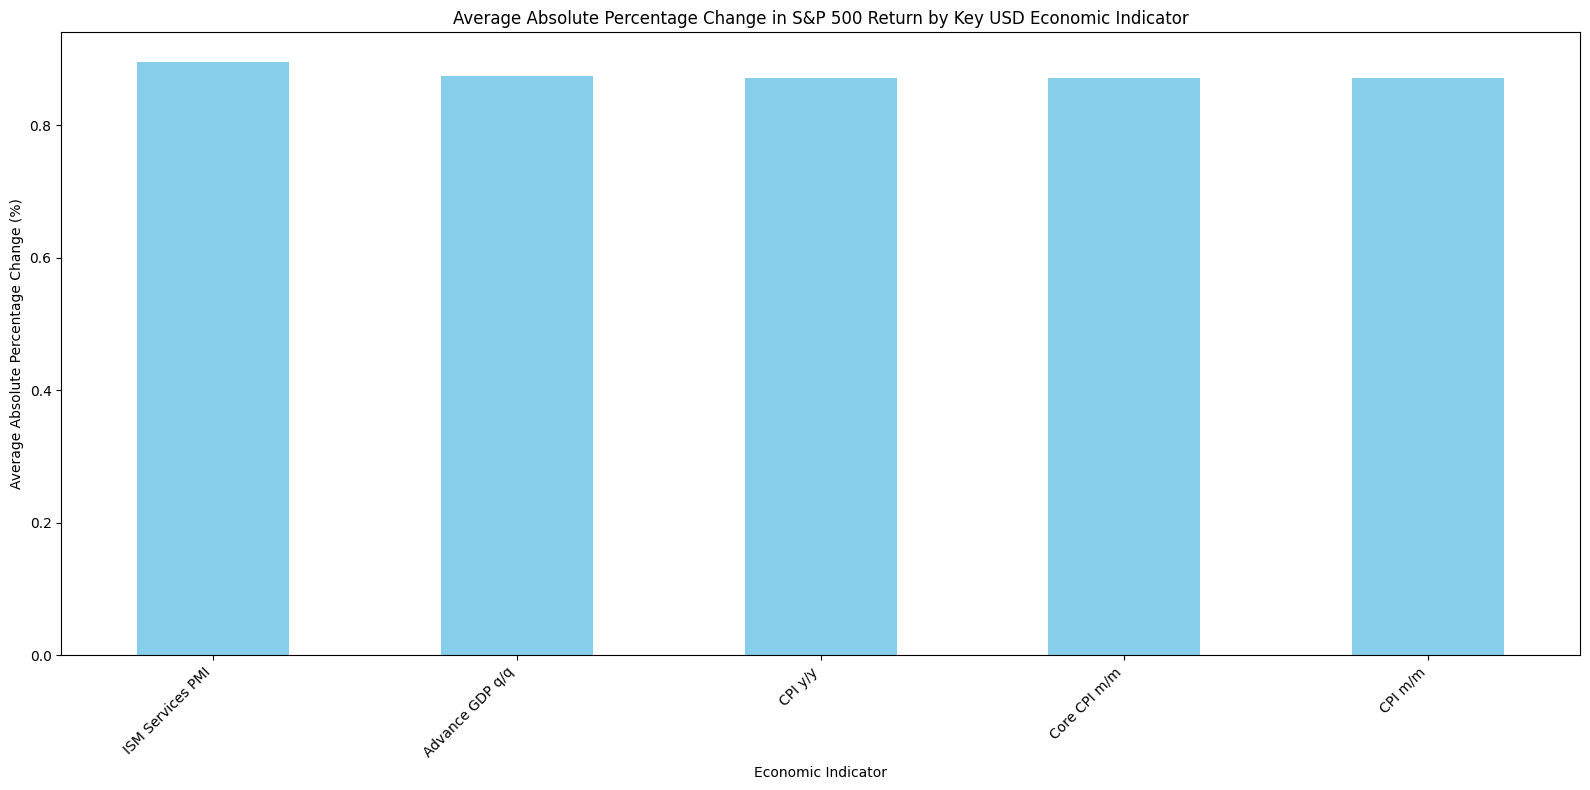

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Define a list of key USD economic indicators to analyze ---
key_economic_indicators = [
    'Non-Farm Employment Change',
    'Unemployment Rate',
    'CPI m/m',
    'CPI y/y',
    'Core CPI m/m',
    'PPI m/m',
    'PPI y/y',
    'Core PPI m/m',
    'GDP QoQ Adv',
    'Advance GDP q/q',
    'GDP QoQ Final',
    'Retail Sales m/m',
    'Core Retail Sales m/m',
    'Industrial Production m/m',
    'Capacity Utilization Rate',
    'ISM Manufacturing PMI',
    'ISM Services PMI',
    'Trade Balance',
    'Housing Starts',
    'Building Permits',
    'Existing Home Sales',
    'New Home Sales',
    'Durable Goods Orders m/m',
    'Core Durable Goods Orders m/m',
    'Personal Income m/m',
    'Personal Spending m/m',
    'CB Consumer Confidence',
    'Prelim UoM Consumer Sentiment',
    'JOLTS Job Openings',
    'Unemployment Claims'
    # Add or remove indicators based on your preference and data availability
]

# --- Filter for USD economic events in our list ---
usd_indicators_data = merged_all[
    (merged_all['currency'] == 'USD') &
    (merged_all['event'].isin(key_economic_indicators))
].copy()
usd_indicators_data = usd_indicators_data.dropna(subset=['event', 'sp500_return'])

# --- Calculate absolute S&P 500 return ---
usd_indicators_data['abs_sp500_return'] = np.abs(usd_indicators_data['sp500_return'])

# --- Check if the column exists *before* grouping ---
if 'abs_sp500_return' in usd_indicators_data.columns:
    # --- Group by event and calculate the average absolute percentage change in S&P 500 return ---
    average_volatility_by_indicator = usd_indicators_data.groupby('event')['abs_sp500_return'].mean().sort_values(ascending=False).head(5) * 100

    print("Average Absolute Percentage Change in S&P 500 Return by Key USD Economic Indicator:")
    print(average_volatility_by_indicator)

    # --- Visualize the results ---
    plt.figure(figsize=(16, 8))
    average_volatility_by_indicator.plot(kind='bar', color='skyblue')
    plt.title('Average Absolute Percentage Change in S&P 500 Return by Key USD Economic Indicator')
    plt.xlabel('Economic Indicator')
    plt.ylabel('Average Absolute Percentage Change (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: The 'abs_sp500_return' column was not found in usd_indicators_data.")
    print("Columns present:", usd_indicators_data.columns)

In [133]:
print("First few rows of usd_indicators_data before dropna:")
print(usd_indicators_data.head())

First few rows of usd_indicators_data before dropna:
      id             datetime currency                       event  \
30  3236  2007-01-03 15:00:00      USD       ISM Manufacturing PMI   
50  3243  2007-01-04 13:30:00      USD         Unemployment Claims   
52  3244  2007-01-04 15:00:00      USD            ISM Services PMI   
66  3249  2007-01-05 13:30:00      USD  Non-Farm Employment Change   
67  3250  2007-01-05 13:30:00      USD           Unemployment Rate   

                  impact  actual      actual_unit  forecast    forecast_unit  \
30  High Impact Expected    51.4        unit_none      51.0        unit_none   
50   Low Impact Expected   329.0    unit_thousand     318.0    unit_thousand   
52  High Impact Expected    57.1        unit_none      58.0        unit_none   
66  High Impact Expected   167.0    unit_thousand     115.0    unit_thousand   
67  High Impact Expected     4.5  unit_percentage       4.5  unit_percentage   

    previous    previous_unit previous_revise